In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

In [2]:
data = pd.DataFrame({
    'Name':['a','b','c','d','e','f','g','h'],
    'marks':['na',12,34,56,78,'nan',98,89]
})

In [3]:
data


,Name,marks
0,a,na
1,b,12
2,c,34
3,d,56
4,e,78
5,f,nan
6,g,98
7,h,89


In [4]:
data.isnull().sum()

Name     0
marks    0
dtype: int64

In [5]:
# As we can see it shows no null values present even though we have some inappopriate vales like na and nan.

# Coverting our dataframe into csv file

In [6]:
missing_values = ['na','nan',np.nan]
# we are making an list of specific words or values which may occure in place of null values.

In [7]:
data.to_csv("error.csv", index = False)

# Showing the missing null values


In [8]:
df = pd.read_csv("error.csv",na_values = missing_values)

In [9]:
df


,Name,marks
0,a,NaN
1,b,12.0
2,c,34.0
3,d,56.0
4,e,78.0
5,f,NaN
6,g,98.0
7,h,89.0


In [10]:
df.isnull()

,Name,marks
0,False,True
1,False,False
2,False,False
3,False,False
4,False,False
5,False,True
6,False,False
7,False,False


In [11]:
df.isnull().sum()

Name     0
marks    2
dtype: int64

In [12]:
# now we can see we have two null vvalues in the marks column and we have to deal with that.

Visualizing the missing values  in a heatmap.

<AxesSubplot:>

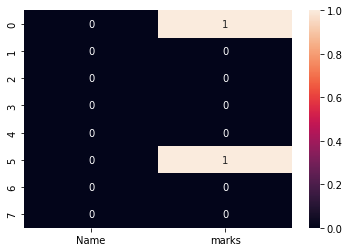

In [13]:
sb.heatmap(df.isnull(),annot = True)

# Removing the missing values.

if we use dropna() then it will delete the row which contains a null value.

In [14]:
df

,Name,marks
0,a,NaN
1,b,12.0
2,c,34.0
3,d,56.0
4,e,78.0
5,f,NaN
6,g,98.0
7,h,89.0


In [15]:
temp = df

In [16]:
df.dropna()

,Name,marks
1,b,12.0
2,c,34.0
3,d,56.0
4,e,78.0
6,g,98.0
7,h,89.0


so if we want to remove the row only if all the values are null then we have to use the following :

In [17]:
df.dropna(how = "all")

,Name,marks
0,a,NaN
1,b,12.0
2,c,34.0
3,d,56.0
4,e,78.0
5,f,NaN
6,g,98.0
7,h,89.0


In [18]:
# since there is no row is fully null, so nothing is removed

# Filling the null values


In [19]:
temp

,Name,marks
0,a,NaN
1,b,12.0
2,c,34.0
3,d,56.0
4,e,78.0
5,f,NaN
6,g,98.0
7,h,89.0


In [21]:
# we can replace null values with 0 or any number we want.
temp.fillna(0)


,Name,marks
0,a,0.0
1,b,12.0
2,c,34.0
3,d,56.0
4,e,78.0
5,f,0.0
6,g,98.0
7,h,89.0


In [22]:
# we can use forward fill or backward fill to fill the null values.

In [25]:
temp.fillna(method="ffill")

,Name,marks
0,a,NaN
1,b,12.0
2,c,34.0
3,d,56.0
4,e,78.0
5,f,78.0
6,g,98.0
7,h,89.0


In [26]:
# marks of a didn't change because there is no previous values to be copied.

In [27]:
temp.fillna(method = "bfill")

,Name,marks
0,a,12.0
1,b,12.0
2,c,34.0
3,d,56.0
4,e,78.0
5,f,98.0
6,g,98.0
7,h,89.0


In [28]:
temp.interpolate()

,Name,marks
0,a,NaN
1,b,12.0
2,c,34.0
3,d,56.0
4,e,78.0
5,f,88.0
6,g,98.0
7,h,89.0


In [29]:
# interpolate = (previous+next)/2 . since there is no previous value before a so it is null. But interpolate is most appropriate to use.